# Intro to Stats I - Predict Titanic Survivors

The aim is to use random simulation to see if a variable has statistical significance

## Import raw data in csv

In [1]:
import pandas as pd
import random
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

titanic_df = pd.read_csv('../datasets/titanic.csv')
titanic_df.iloc[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
def get_sex_survival_rate(df):
    female_df = df[df['Sex'] == 'female']
    male_df = df[df['Sex'] == 'male']
    total_female = len(female_df)
    total_male = len(male_df)
    total_count = len(df)
    female_survival_rate = len(female_df[female_df['Survived'] == 1]) / total_female
    male_survival_rate = len(male_df[male_df['Survived'] == 1]) / total_male
    return female_survival_rate, male_survival_rate

total_count = len(titanic_df)
total_female = len(titanic_df[titanic_df.Sex == 'female'])
total_male = len(titanic_df[titanic_df.Sex == 'male'])
print('Total count - {}, Female - {}, Male - {}'.format(total_count, total_female, total_male))
get_sex_survival_rate(titanic_df)

Total count - 891, Female - 314, Male - 577


(0.7420382165605095, 0.18890814558058924)

# Hypothesis

Null Hypothesis: **High female survival rate is purely due to chance**

Randomly assign survival rates to people and see the stats generated by random survival rate

In [3]:
iterations = 1000

simulation_result = []
test_df = titanic_df.copy(deep=True)
for i in range(iterations):
    survived = [1 if random.random() > 0.5 else 0 for x in range(total_count)]
    test_df['Survived'] = pd.DataFrame(survived)
    rates = get_sex_survival_rate(test_df)
    simulation_result.append(rates)

sim_df = pd.DataFrame(simulation_result, columns=['F survival', 'M survival'])
sim_df.describe()

,F survival,M survival
count,1000.000000,1000.000000
mean,0.499618,0.500239
std,0.027851,0.020721
min,0.401274,0.433276
25%,0.480892,0.487002
50%,0.496815,0.499133
75%,0.515924,0.514731
max,0.585987,0.571924


In [4]:
f_sample_test = stats.ttest_1samp(sim_df['F survival'], 0.742).pvalue
m_sample_test = stats.ttest_1samp(sim_df['M survival'], 0.1889).pvalue
print('The chance of 74.2% female will survive at random is {:.2f}%'.format(f_sample_test * 100))
print('The chance of 18.89% male will survive at random is {:.2f}%'.format(m_sample_test * 100))

The chance of 74.2% female will survive at random is 0.00%
The chance of 18.89% male will survive at random is 0.00%


Text(0,0.5,'Female Survival')

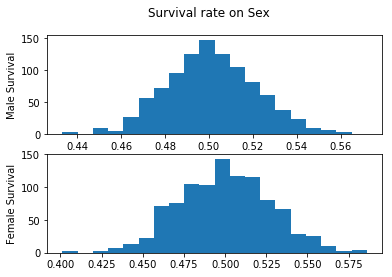

In [5]:
f, ax = plt.subplots(2, 1)
f.suptitle('Survival rate on Sex')
ax[0].hist(sim_df['M survival'], bins=20)
ax[0].set_ylabel('Male Survival')
ax[1].hist(sim_df['F survival'], bins=20)
ax[1].set_ylabel('Female Survival')

(array([  7.,  33., 134., 242., 289., 180.,  91.,  18.,   5.,   1.]),
 array([-0.10999128, -0.08458753, -0.05918379, -0.03378004, -0.00837629,
         0.01702745,  0.0424312 ,  0.06783495,  0.09323869,  0.11864244,
         0.14404619]),
 <a list of 10 Patch objects>)

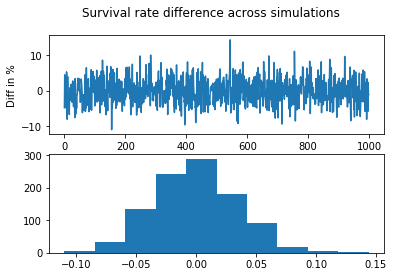

In [6]:
f, ax = plt.subplots(2, 1)
f.suptitle('Survival rate difference across simulations')
diff_in_survival = (sim_df['F survival'] - sim_df['M survival'])
ax[0].plot(diff_in_survival * 100)
ax[0].set_ylabel('Diff in %')
ax[1].hist(diff_in_survival)

In [7]:
diff_in_survival.describe()

count    1000.000000
mean       -0.000621
std         0.035276
min        -0.109991
25%        -0.025007
50%        -0.000844
75%         0.023419
max         0.144046
dtype: float64

Difference in survial rate between male and female during simulation has a std of 3.57%. Even with 3*std, the difference between survival rate should be around 10%. However the actual survial rate were 74.2% and 18.89%, a gap that is much bigger than 10%. As the p-value shows, the chance of this happening at random is 0.0%

# Test other parameters

In [8]:
titanic_df[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Hypothesis on Age

See whether the babies are indeed had a higher survial rate than randomness suggest

Null hypothesis: ** Survival rate for age group between 0 and 5 has an average survial rate **

(array([27., 11.,  7., 34., 39., 38., 40., 33., 18., 16., 14.,  6.,  6.,
         0.,  0.,  0.,  1.,  0.,  0.]),
 array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80,
        85, 90, 95]),
 <a list of 19 Patch objects>)

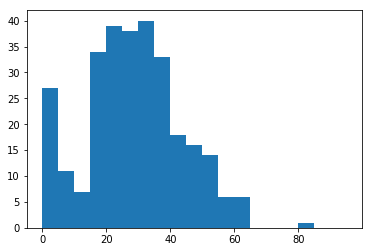

In [9]:
age_df = titanic_df[['Age', 'Survived']]
age_df = age_df[[~np.isnan(x) for x in age_df['Age']]]
survived_age_df = age_df[age_df['Survived'] == 1]

age_buckets = [x for x in range(0, 100, 5)]

plt.hist(survived_age_df['Age'], bins=age_buckets)

Based on the distribution chart, it does seem to indicate that babies has a higher survival number. Investigate the actual survival rate for each age bucket next.

<BarContainer object of 19 artists>

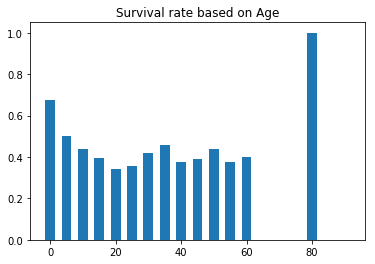

In [10]:
def get_age_survival_rate(df, buckets):
    survival_list = []
    for i in range(len(buckets) - 1):
        age_min = buckets[i]
        age_max = buckets[i+1]
        bucket_df = df[age_min <= df['Age']]
        bucket_df = bucket_df[bucket_df['Age'] < age_max]
        bucket_total = len(bucket_df)
        bucket_survived = len(bucket_df[bucket_df['Survived'] == 1])
        if bucket_total == 0:
            survive_rate = 0
        else:
            survive_rate = bucket_survived / bucket_total
        survival_list.append(survive_rate)
    return survival_list

age_survival_rate = get_age_survival_rate(age_df, age_buckets)

f, ax = plt.subplots(1, 1)
ax.set_title('Survival rate based on Age')
ax.bar(x=age_buckets[:-1], height=age_survival_rate, width=3)

Run random simulation and determine whether the survival rate for age group 0-5 is caused by randomness.

In [11]:
iterations = 100

simulation_result = []
test_df = age_df.copy(deep=True)
for i in range(iterations):
    survived = [1 if random.random() > 0.5 else 0 for x in range(total_count)]
    test_df['Survived'] = pd.DataFrame(survived)
    rates = get_age_survival_rate(test_df, age_buckets)
    simulation_result.append(rates)

labels = []
for i in range(len(age_buckets)-1):
    labels.append('{}-{}'.format(age_buckets[i], age_buckets[i+1]))
sim_df = pd.DataFrame(simulation_result, columns=labels)
sim_df.describe()

,0-5,5-10,10-15,15-20,20-25,25-30,30-35,35-40,40-45,45-50,50-55,55-60,60-65,65-70,70-75,75-80,80-85,85-90,90-95
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.000000,100.0,100.0
mean,0.487250,0.496818,0.505625,0.503605,0.507982,0.502264,0.488947,0.496944,0.511667,0.516098,0.484063,0.491875,0.522000,0.510000,0.510000,0.0,0.520000,0.0,0.0
std,0.079812,0.099932,0.125345,0.055500,0.049214,0.043078,0.048994,0.061974,0.075396,0.091505,0.076867,0.123301,0.133352,0.256038,0.195086,0.0,0.502117,0.0,0.0
min,0.300000,0.272727,0.187500,0.383721,0.377193,0.405660,0.368421,0.333333,0.333333,0.317073,0.281250,0.250000,0.200000,0.000000,0.000000,0.0,0.000000,0.0,0.0
25%,0.425000,0.409091,0.437500,0.462209,0.473684,0.471698,0.452632,0.458333,0.458333,0.439024,0.437500,0.375000,0.450000,0.250000,0.333333,0.0,0.000000,0.0,0.0
50%,0.487500,0.500000,0.500000,0.511628,0.517544,0.500000,0.494737,0.500000,0.510417,0.512195,0.468750,0.500000,0.533333,0.500000,0.500000,0.0,1.000000,0.0,0.0
75%,0.550000,0.590909,0.625000,0.546512,0.535088,0.528302,0.526316,0.541667,0.562500,0.585366,0.531250,0.562500,0.600000,0.750000,0.666667,0.0,1.000000,0.0,0.0
max,0.700000,0.681818,0.750000,0.616279,0.622807,0.632075,0.610526,0.666667,0.666667,0.804878,0.687500,0.812500,0.800000,1.000000,1.000000,0.0,1.000000,0.0,0.0


In [12]:
rates = get_age_survival_rate(age_df, age_buckets)
for l, r in zip(labels, rates):
    if sim_df[l].std() == 0:
        continue
    delta_from_mean = abs(r - sim_df[l].mean()) / sim_df[l].std()
    sample_test = 1 - stats.norm.cdf(delta_from_mean)
    print('The chance of {:.2f}% aged {} will survive at random is {:.2f}%'.format(r * 100, l, sample_test * 100))

The chance of 67.50% aged 0-5 will survive at random is 0.93%
The chance of 50.00% aged 5-10 will survive at random is 48.73%
The chance of 43.75% aged 10-15 will survive at random is 29.34%
The chance of 39.53% aged 15-20 will survive at random is 2.56%
The chance of 34.21% aged 20-25 will survive at random is 0.04%
The chance of 35.85% aged 25-30 will survive at random is 0.04%
The chance of 42.11% aged 30-35 will survive at random is 8.29%
The chance of 45.83% aged 35-40 will survive at random is 26.66%
The chance of 37.50% aged 40-45 will survive at random is 3.49%
The chance of 39.02% aged 45-50 will survive at random is 8.45%
The chance of 43.75% aged 50-55 will survive at random is 27.23%
The chance of 37.50% aged 55-60 will survive at random is 17.16%
The chance of 40.00% aged 60-65 will survive at random is 18.01%
The chance of 0.00% aged 65-70 will survive at random is 2.32%
The chance of 0.00% aged 70-75 will survive at random is 0.45%
The chance of 100.00% aged 80-85 will s

In [13]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Step further - Decision tree

In [23]:
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

enc_sex = preprocessing.LabelEncoder()
enc_embark = preprocessing.LabelEncoder()
enc_embark_one = preprocessing.OneHotEncoder(sparse=False)

# Preprocess
X_labels = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
y_label = 'Survived'
labels = X_labels.copy()
labels.append(y_label)
train_df = titanic_df[labels]
train_df = train_df.assign(**{'Sex': enc_sex.fit_transform(train_df['Sex'])})
out = enc_embark.fit_transform(train_df['Embarked'].fillna('N')).reshape(-1, 1)
enc_embark_one.fit(out)
out = enc_embark_one.transform(out)
print('Mapping: {}'.format(enc_embark.classes_))

out = pd.DataFrame(out, columns=['C', 'N', 'Q', 'S'])
train_df = train_df.join(out)
del train_df['Embarked']
X_labels.remove('Embarked')
for tag in ['C', 'N', 'Q', 'S']:
    X_labels.append(tag)
train_df = train_df.dropna()
#print([x for x in dir(enc_sex) if '_' != x[0]])

X = train_df[X_labels]
y = train_df[y_label]
clf = tree.DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, max_features=5)
print("X: {}".format(X[:5]))
print("y: {}".format(y[:5]))
clf.fit(X, y)
cross_validate(clf, X, y, cv=5, scoring='precision_macro')

Mapping: ['C' 'N' 'Q' 'S']
X:    Pclass  Sex   Age  SibSp  Parch     Fare    C    N    Q    S
0       3    1  22.0      1      0   7.2500  0.0  0.0  0.0  1.0
1       1    0  38.0      1      0  71.2833  1.0  0.0  0.0  0.0
2       3    0  26.0      0      0   7.9250  0.0  0.0  0.0  1.0
3       1    0  35.0      1      0  53.1000  0.0  0.0  0.0  1.0
4       3    1  35.0      0      0   8.0500  0.0  0.0  0.0  1.0
y: 0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


/anaconda3/envs/datafellow/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.00371408, 0.00193214, 0.00400305, 0.00273681, 0.00177217]),
 'score_time': array([0.00147772, 0.0010879 , 0.00094604, 0.00099826, 0.00088382]),
 'test_score': array([0.71741324, 0.80396825, 0.74955752, 0.81283186, 0.85711051]),
 'train_score': array([0.83754498, 0.83192251, 0.80205982, 0.86782903, 0.84193735])}

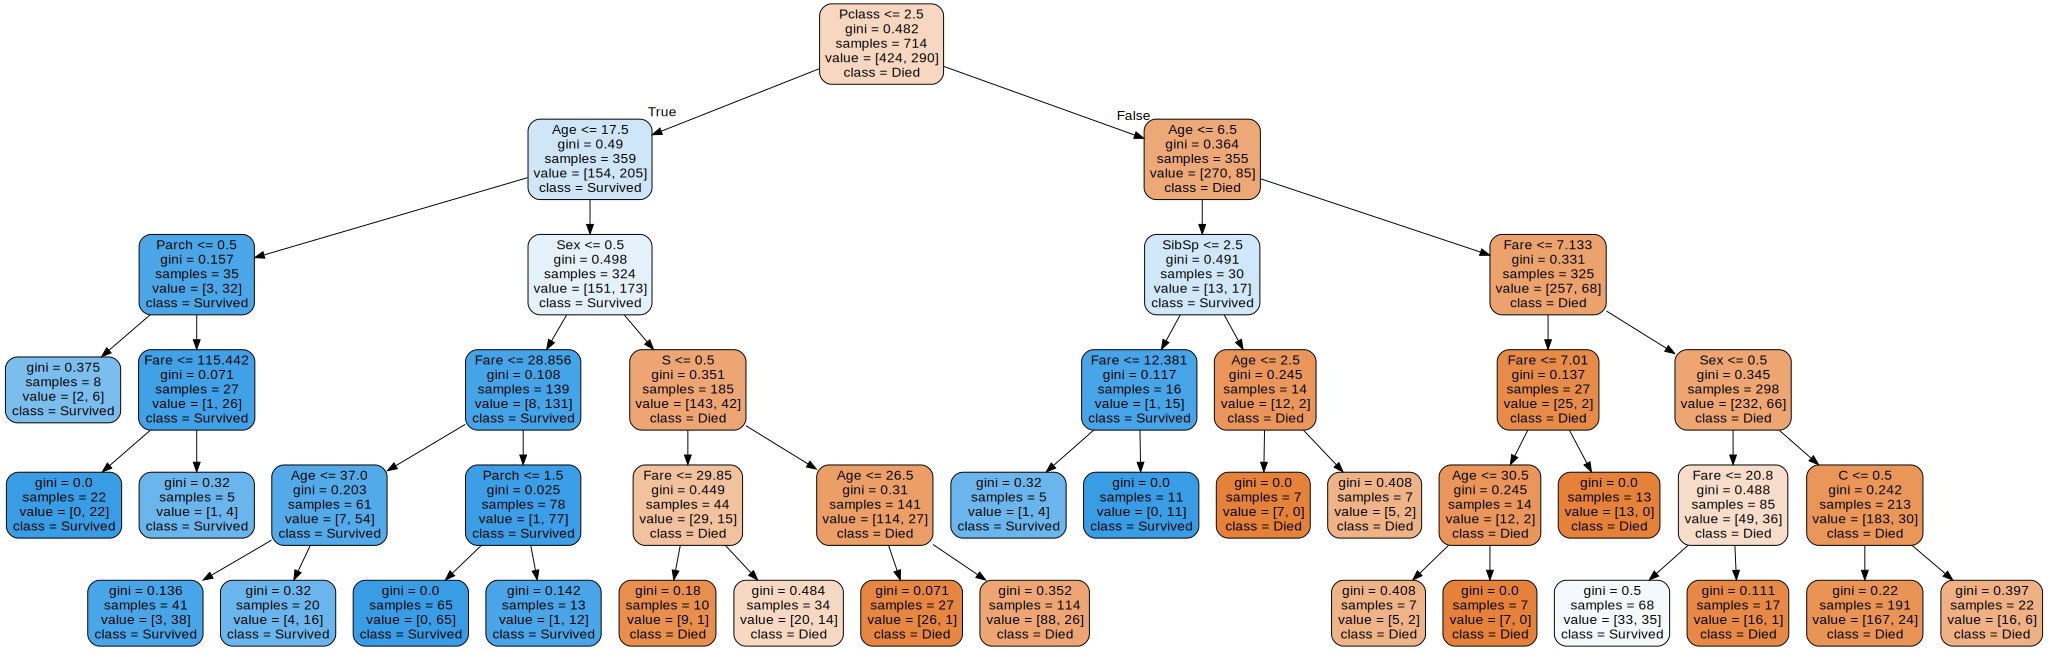

In [29]:
import graphviz
%matplotlib inline
dot_data = tree.export_graphviz(clf, out_file=None,
                               feature_names=X_labels,
                               class_names=['Died', 'Survived'],
                               rounded=True, filled=True) 
graph = graphviz.Source(dot_data) 
graph